In [7]:
# –ò–º–ø–æ—Ä—Ç—ã
import torch
import torch.nn as nn
import sqlite3
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import importlib
import student_transformer
importlib.reload(student_transformer)
from student_transformer import StudentTransformer
from data_loader import StudentPerformanceDataset, collate_fn
from torch.utils.data import DataLoader

# –ö–æ–Ω—Å—Ç–∞–Ω—Ç—ã
SEQ_LEN = 8
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"–ò—Å–ø–æ–ª—å–∑—É–µ–º —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ: {DEVICE}")

–ò—Å–ø–æ–ª—å–∑—É–µ–º —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ: cuda


In [8]:
dataset = StudentPerformanceDataset(db_path="school.db", seq_len=8)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, collate_fn=collate_fn)

print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π: {len(dataset)}")
print(f"–ü—Ä–∏–º–µ—Ä –±–∞—Ç—á–∞:")
for batch in dataloader:
    print("subject.shape:", batch["subject"].shape)
    print("numeric.shape:", batch["numeric"].shape)
    print("target.shape:", batch["target"].shape)
    break

‚úÖ –ó–∞–≥—Ä—É–∂–µ–Ω–æ 240000 –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π (train)
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π: 240000
–ü—Ä–∏–º–µ—Ä –±–∞—Ç—á–∞:
subject.shape: torch.Size([64, 8])
numeric.shape: torch.Size([64, 8, 3])
target.shape: torch.Size([64])


In [10]:
model = StudentTransformer(
    num_subjects=5,
    num_absence_reasons=6,   # ‚Üê –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ 6!
    num_club_types=2,
    numeric_features=3,
    embed_dim=64,
    num_heads=4,
    num_layers=2,
    pred_type="binary"
)

print("‚úÖ –ú–æ–¥–µ–ª—å —Å–æ–∑–¥–∞–Ω–∞")
print("–ß–∏—Å–ª–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤:", sum(p.numel() for p in model.parameters()))

‚úÖ –ú–æ–¥–µ–ª—å —Å–æ–∑–¥–∞–Ω–∞
–ß–∏—Å–ª–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: 565633


In [16]:
# –°–Ω–∞—á–∞–ª–∞ –∑–∞–≥—Ä—É–∑–∏ –¥–∞–Ω–Ω—ã–µ
from data_loader import StudentPerformanceDataset, collate_fn
from torch.utils.data import DataLoader

train_dataset = StudentPerformanceDataset(split="train")
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, collate_fn=collate_fn)

# –ó–∞—Ç–µ–º –æ–±—É—á–µ–Ω–∏–µ
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

model.train()
losses = []

for epoch in range(15):  # 10 —ç–ø–æ—Ö
    epoch_loss = 0
    for i, batch in enumerate(train_loader):  # ‚Üê –ò—Å–ø–æ–ª—å–∑—É–µ–º train_loader!
        batch = {k: v.to(device) for k, v in batch.items()}
        
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, batch["target"])
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        if i % 50 == 0:
            print(f"–≠–ø–æ—Ö–∞ {epoch+1}, —à–∞–≥ {i}, loss: {loss.item():.4f}")
    
    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"–°—Ä–µ–¥–Ω–∏–π loss –∑–∞ —ç–ø–æ—Ö—É: {avg_loss:.4f}")

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
torch.save(model.state_dict(), "student_transformer.pth")
print("‚úÖ –ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞")

‚úÖ –ó–∞–≥—Ä—É–∂–µ–Ω–æ 240000 –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π (train)
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 0, loss: 0.2747
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 50, loss: 0.3318
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 100, loss: 0.3305
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 150, loss: 0.2562
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 200, loss: 0.4346
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 250, loss: 0.3629
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 300, loss: 0.2994
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 350, loss: 0.3352
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 400, loss: 0.2269
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 450, loss: 0.2738
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 500, loss: 0.2484
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 550, loss: 0.2454
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 600, loss: 0.3077
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 650, loss: 0.2083
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 700, loss: 0.3311
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 750, loss: 0.3491
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 800, loss: 0.4654
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 850, loss: 0.2383
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 900, loss: 0.3559
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 950, loss: 0.5149
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 1000, loss: 0.2720
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 1050, loss: 0.2592
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 1100, loss: 0.2221
–≠–ø–æ—Ö–∞ 1, —à–∞–≥ 1150,

In [17]:
# –ó–∞–≥—Ä—É–∑–∫–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
test_dataset = StudentPerformanceDataset(split="test")
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, collate_fn=collate_fn)

# –û—Ü–µ–Ω–∫–∞
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(batch)
        all_preds.extend(outputs.cpu().numpy())
        all_targets.extend(batch["target"].cpu().numpy())

# –ú–µ—Ç—Ä–∏–∫–∏
preds_binary = (np.array(all_preds) > 0.5).astype(int)
targets = np.array(all_targets)

print(f"Accuracy: {accuracy_score(targets, preds_binary):.4f}")
print(f"F1-score: {f1_score(targets, preds_binary):.4f}")
print(f"AUC-ROC:  {roc_auc_score(targets, all_preds):.4f}")

‚úÖ –ó–∞–≥—Ä—É–∂–µ–Ω–æ 60000 –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π (test)
Accuracy: 0.8603
F1-score: 0.5989
AUC-ROC:  0.8902


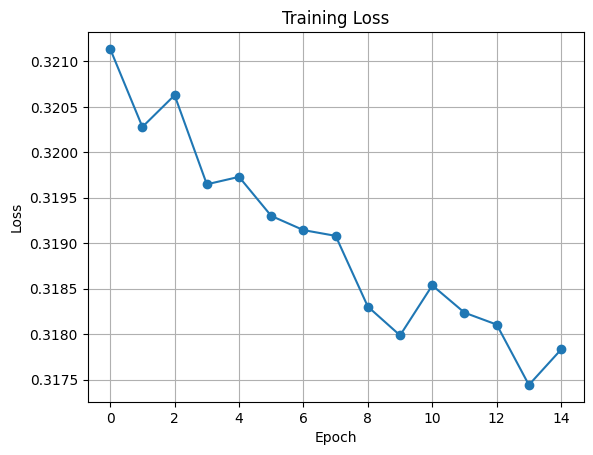

In [18]:
plt.plot(losses, marker='o')  # ‚Üê –¥–æ–±–∞–≤–∏–ª–∏ –º–∞—Ä–∫–µ—Ä
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [20]:
# === –Ø—á–µ–π–∫–∞: –ü—Ä–∏–º–µ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è (–∏–Ω—Ñ–µ—Ä–µ–Ω—Å) ===

# 1. –ó–∞–≥—Ä—É–∑–∏–º —Å–æ—Ö—Ä–∞–Ω—ë–Ω–Ω—É—é –º–æ–¥–µ–ª—å
model.load_state_dict(torch.load("student_transformer.pth", map_location=device))
model.eval()

# 2. –ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –ø—Ä–∏–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö (8 –Ω–µ–¥–µ–ª—å –ø–æ –º–∞—Ç–µ–º–∞—Ç–∏–∫–µ)
# –§–æ—Ä–º–∞—Ç: [–Ω–µ–¥–µ–ª—è 1, –Ω–µ–¥–µ–ª—è 2, ..., –Ω–µ–¥–µ–ª—è 8]
example_data = {
    "subject": "math",
    "grades": [4.5, 4.0, 4.0, 3.5, 3.0, 3.0, 2.5, 3.0],        # –æ—Ü–µ–Ω–∫–∏ –ø–∞–¥–∞—é—Ç
    "attendance": [1, 1, 1, 0, 0, 1, 1, 1],                      # –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–∞ 4-5 –Ω–µ–¥–µ–ª—è—Ö
    "club_attended": [1, 1, 0, 0, 0, 0, 0, 0],                   # –ø–µ—Ä–µ—Å—Ç–∞–ª —Ö–æ–¥–∏—Ç—å –≤ –∫—Ä—É–∂–æ–∫
    "absence_reasons": [None, None, None, "illness", "illness", None, None, None]
}

# 3. –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ —Ñ–æ—Ä–º–∞—Ç –º–æ–¥–µ–ª–∏
SUBJECT_TO_ID = {"math":0, "russian":1, "physics":2, "literature":3, "biology":4}
REASON_TO_ID = {None:0, "illness":1, "competition":2, "family":3, "other":4, "camp":5}

subject_id = SUBJECT_TO_ID[example_data["subject"]]
absence_ids = [REASON_TO_ID.get(r, 4) for r in example_data["absence_reasons"]]
numeric = np.stack([
    example_data["grades"],
    example_data["attendance"],
    example_data["club_attended"]
], axis=1).astype(np.float32)

# –°–æ–∑–¥–∞—ë–º –±–∞—Ç—á –∏–∑ –æ–¥–Ω–æ–≥–æ –ø—Ä–∏–º–µ—Ä–∞
batch = {
    "subject": torch.tensor([[subject_id] * 8]),      # [1, 8]
    "absence": torch.tensor([absence_ids]),           # [1, 8]
    "club": torch.tensor([example_data["club_attended"]]),  # [1, 8]
    "numeric": torch.from_numpy(numeric[None, :])
}

# 4. –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
with torch.no_grad():
    prob = model({k: v.to(device) for k, v in batch.items()}).item()

# 5. –í—ã–≤–æ–¥
print(f"üéì –ü—Ä–æ–≥–Ω–æ–∑ –¥–ª—è —É—á–µ–Ω–∏–∫–∞ –ø–æ –ø—Ä–µ–¥–º–µ—Ç—É '{example_data['subject']}':")
print(f"   –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Å–Ω–∏–∂–µ–Ω–∏—è —É—Å–ø–µ–≤–∞–µ–º–æ—Å—Ç–∏: {prob:.2%}")
if prob > 0.5:
    print("   ‚ö†Ô∏è  –†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –ø–µ–¥–∞–≥–æ–≥–∏—á–µ—Å–∫–æ–µ –≤–º–µ—à–∞—Ç–µ–ª—å—Å—Ç–≤–æ!")
else:
    print("   ‚úÖ –†–∏—Å–∫ –Ω–∏–∑–∫–∏–π.")

üéì –ü—Ä–æ–≥–Ω–æ–∑ –¥–ª—è —É—á–µ–Ω–∏–∫–∞ –ø–æ –ø—Ä–µ–¥–º–µ—Ç—É 'math':
   –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Å–Ω–∏–∂–µ–Ω–∏—è —É—Å–ø–µ–≤–∞–µ–º–æ—Å—Ç–∏: 0.42%
   ‚úÖ –†–∏—Å–∫ –Ω–∏–∑–∫–∏–π.
